## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install openpyxl for reading Excel files
#!pip install openpyxl

# Read the Excel file
gss = pd.read_excel('GSS.xlsx')

# Drop the 'id_' column as it is not needed for analysis
gss = gss.drop('id_', axis=1)

gss = gss.drop('ballot', axis=1)

# Display the first few rows of the DataFrame
display(gss.head())


,year,wrkstat,marital,spwrksta,childs,age,educ,speduc
0,1972,Working full time,Never married,.i: Inapplicable,0,23,4 years of college,.i: Inapplicable
1,1972,Retired,Married,KEEPING HOUSE,5,70,10th grade,12th grade
2,1972,Working part time,Married,WORKING FULLTIME,4,48,12th grade,11th grade
3,1972,Working full time,Married,WORKING FULLTIME,0,27,5 years of college,8 or more years of college
4,1972,Keeping house,Married,TEMP NOT WORKING,2,61,12th grade,12th grade


In [42]:
gss.replace({'.n: No answer': np.nan, '.s: Skipped on Web': np.nan, '.d: Do not Know/Cannot Choose': np.nan, '.i: Inapplicable': np.nan}, inplace=True)

display(gss['wrkstat'].value_counts(dropna=False))
display(gss['marital'].value_counts(dropna=False))
display(gss['spwrksta'].value_counts(dropna=False))
display(gss['childs'].value_counts(dropna=False))
display(gss['age'].value_counts(dropna=False))
display(gss['educ'].value_counts(dropna=False))
display(gss['speduc'].value_counts(dropna=False))

,count
wrkstat,
Working full time,36727
Retired,11683
Keeping house,11061
Working part time,7750
"Unemployed, laid off, looking for work",2796
In school,2277
Other,1740
"With a job, but not at work because of temporary illness, vacation, strike",1618
.n: No answer,33


,count
marital,
Married,38959
Never married,16963
Divorced,10158
Widowed,7005
Separated,2548
.n: No answer,45
.s: Skipped on Web,19
.d: Do not Know/Cannot Choose,2


,count
spwrksta,
.i: Inapplicable,36708
WORKING FULLTIME,20985
KEEPING HOUSE,6391
RETIRED,5337
WORKING PARTTIME,3442
"UNEMPL, LAID OFF",788
TEMP NOT WORKING,760
OTHER,741
SCHOOL,411


,count
childs,
0,20956
2,18989
1,11979
3,11671
4,5996
5,2669
6,1381
8 or more,1032
7,734


,count
age,
32,1625
30,1621
34,1614
28,1592
33,1584
...,...
.i: Inapplicable,226
86,222
87,161


,count
educ,
12th grade,22202
4 years of college,10666
2 years of college,8651
1 year of college,6188
11th grade,4046
3 years of college,3484
6 years of college,3187
10th grade,3079
8th grade,2812


,count
speduc,
.i: Inapplicable,37485
12th grade,12595
4 years of college,5767
2 years of college,4031
1 year of college,2447
11th grade,1713
6 years of college,1698
8th grade,1504
10th grade,1491


The data set we selected comes from the General Social Survey (GSS), a bi-annual, nationally representative survey of adults in the United States. The GSS is one of the most widely used sources in the social sciences because it collects high-quality data on a broad range of topics, from family and work to politics and culture. Since it is designed to be representative of the U.S. population, the GSS allows researchers to explore patterns in American life and make meaningful generalizations. For our project, we focused on the theme of family and work dynamics, and we selected a set of variables that together provide a rich picture of these interactions.

The first variable we chose is **wrkstat**, which captures an individual’s employment status. Employment is central to understanding not only economic well-being but also identity and daily routines. Someone employed full time may face different pressures and opportunities compared to someone unemployed, retired, or working part time. By analyzing employment status, we can begin to see how work shapes individual and family roles.

We also selected **marital**, which identifies the marital status of the respondent. Marriage and partnership are critical contexts in which work and family responsibilities intersect. For example, individuals who are married or cohabiting may share resources and responsibilities differently than those who are single, divorced, or widowed. Including this variable allows us to compare how family structure influences work-related choices and pressures.

To better understand household-level dynamics, we included **spwrksta**, which records the employment status of the respondent’s spouse. This is especially important in studying modern family life, since dual-earner households have become increasingly common. Comparing single-earner and dual-earner families allows us to examine how couples balance labor inside and outside the home and how employment patterns of one partner affect the other.

Another essential variable is **childs**, which indicates how many children the respondent has. Children add both time and financial demands to a household, directly influencing decisions about employment and division of labor. For instance, families with more children may be more likely to have one parent reduce work hours or stay home altogether. This variable highlights the role of caregiving in shaping work choices.

We also selected **age**, since family and work dynamics shift over the life course. Younger adults may be focused on entering the workforce or forming families, while older adults may be preparing for retirement or adjusting to an empty nest. Age provides critical context for understanding how responsibilities and opportunities change over time.

Finally, we included **educ** and **speduc**, which measure the highest education levels of the respondent and their spouse. Education strongly predicts employment opportunities, income, and long-term stability. It also influences family patterns, such as the timing of marriage and childbearing. Including both partners’ education levels allows us to consider how socioeconomic status shapes family and work interactions.

Together, these variables provide a comprehensive view of how Americans balance work and family life. The GSS is uniquely suited for this kind of analysis because it offers reliable, representative data across individuals and households. By combining factors like employment, marital status, children, age, and education, we can tell a meaningful story about the interplay between family roles and work responsibilities in contemporary society.


3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)


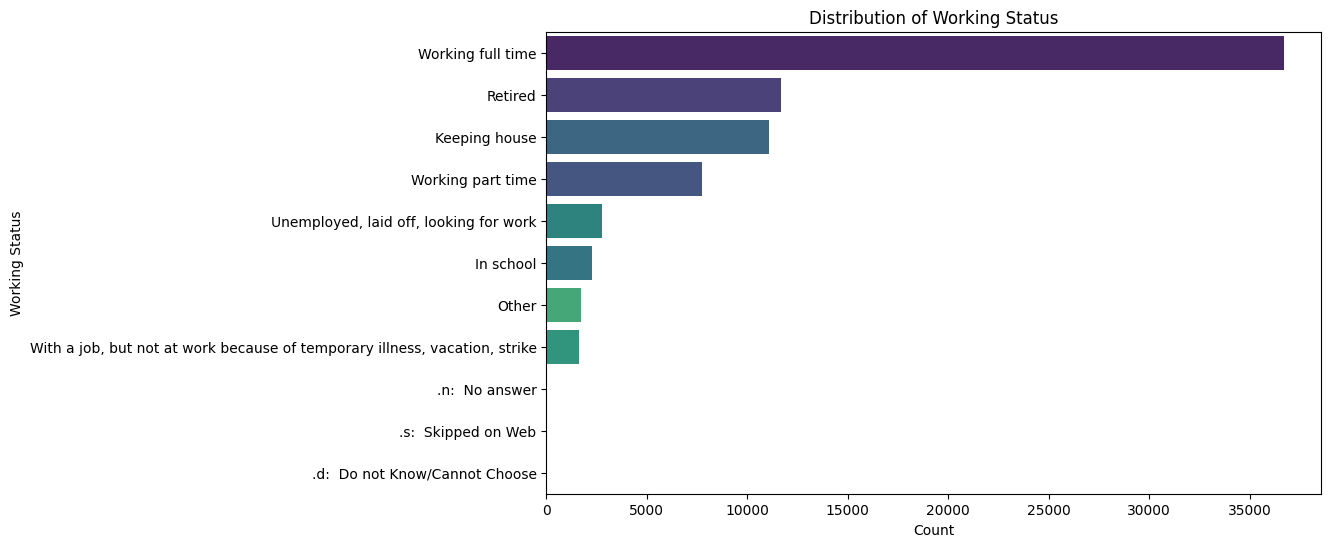

In [49]:
# Bar plot for 'wrkstat'
plt.figure(figsize=(10, 6))
sns.countplot(data=gss, y='wrkstat', order=gss['wrkstat'].value_counts().index, hue='wrkstat', palette='viridis', legend=False)
plt.title('Distribution of Working Status')
plt.xlabel('Count')
plt.ylabel('Working Status')
plt.show()

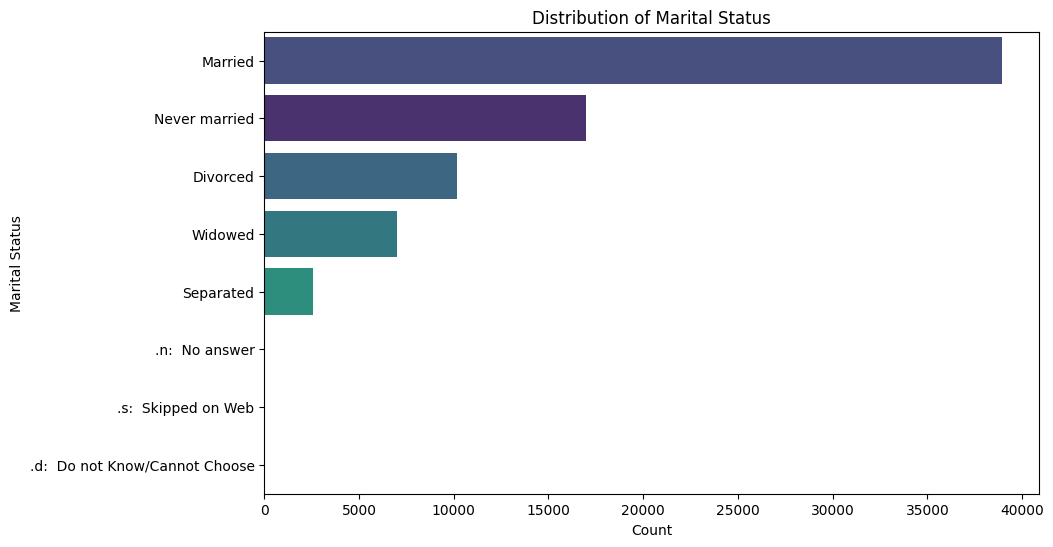

In [50]:
# Bar plot for 'marital'
plt.figure(figsize=(10, 6))
sns.countplot(data=gss, y='marital', order=gss['marital'].value_counts().index, hue='marital', palette='viridis', legend=False)
plt.title('Distribution of Marital Status')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()

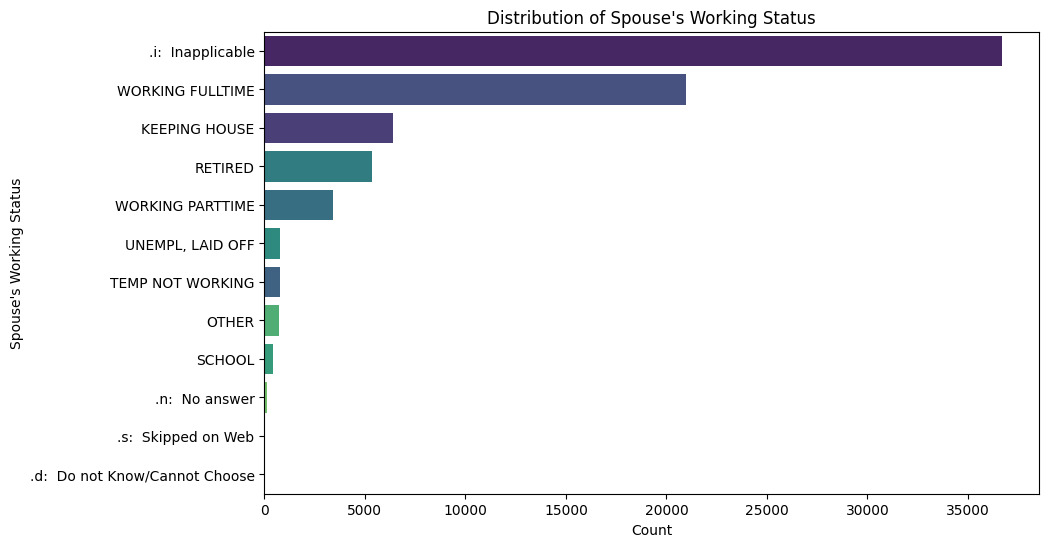

In [51]:
# Bar plot for 'spwrksta'
plt.figure(figsize=(10, 6))
sns.countplot(data=gss, y='spwrksta', order=gss['spwrksta'].value_counts().index, hue='spwrksta', palette='viridis', legend=False)
plt.title("Distribution of Spouse's Working Status")
plt.xlabel('Count')
plt.ylabel("Spouse's Working Status")
plt.show()

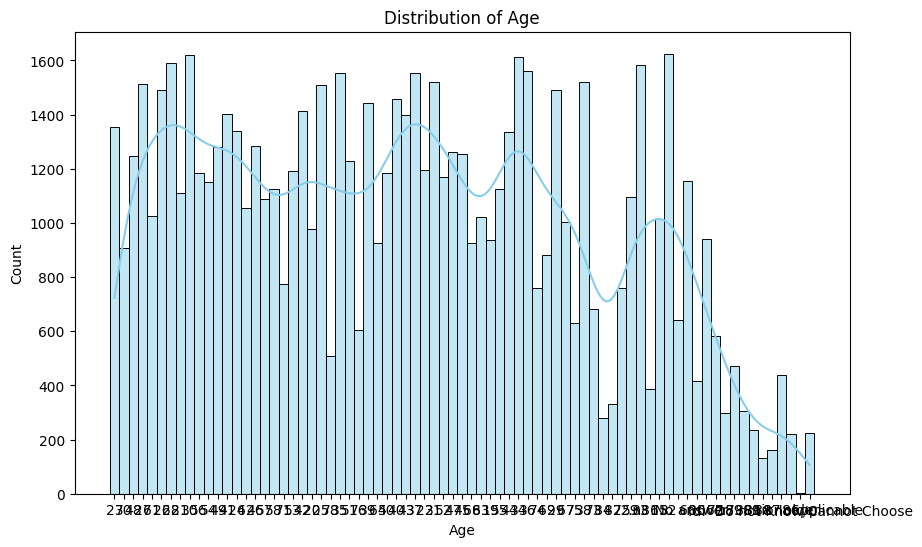

In [46]:
# Histogram for 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data=gss, x='age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

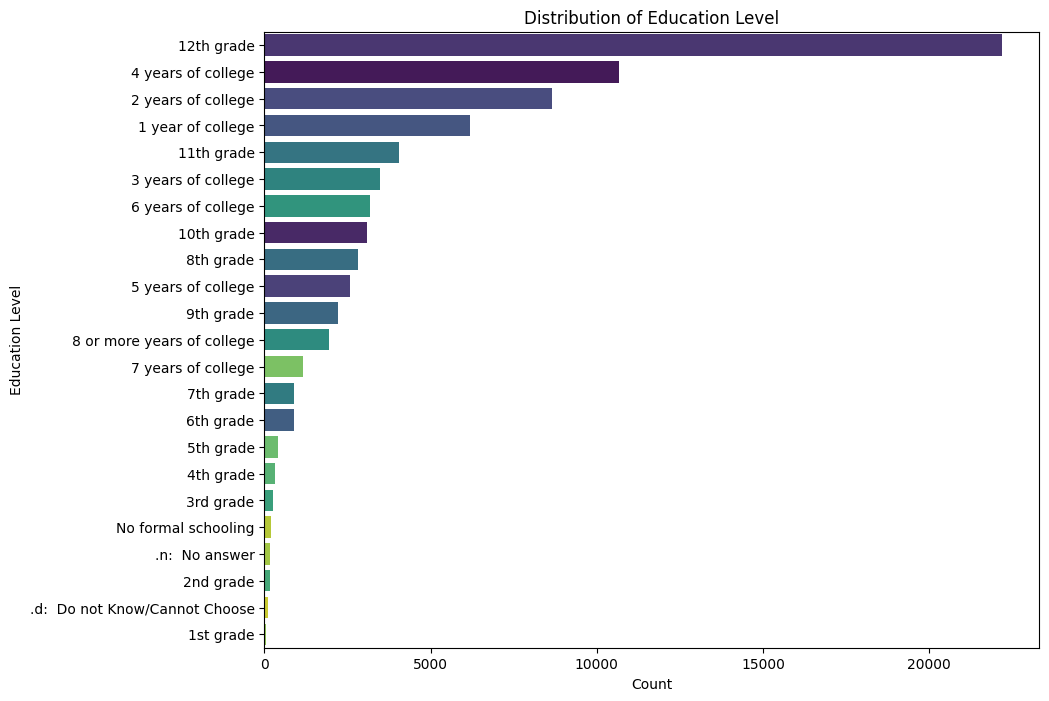

In [52]:
# Bar plot for 'educ'
plt.figure(figsize=(10, 8))
sns.countplot(data=gss, y='educ', order=gss['educ'].value_counts().index, hue='educ', palette='viridis', legend=False)
plt.title('Distribution of Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

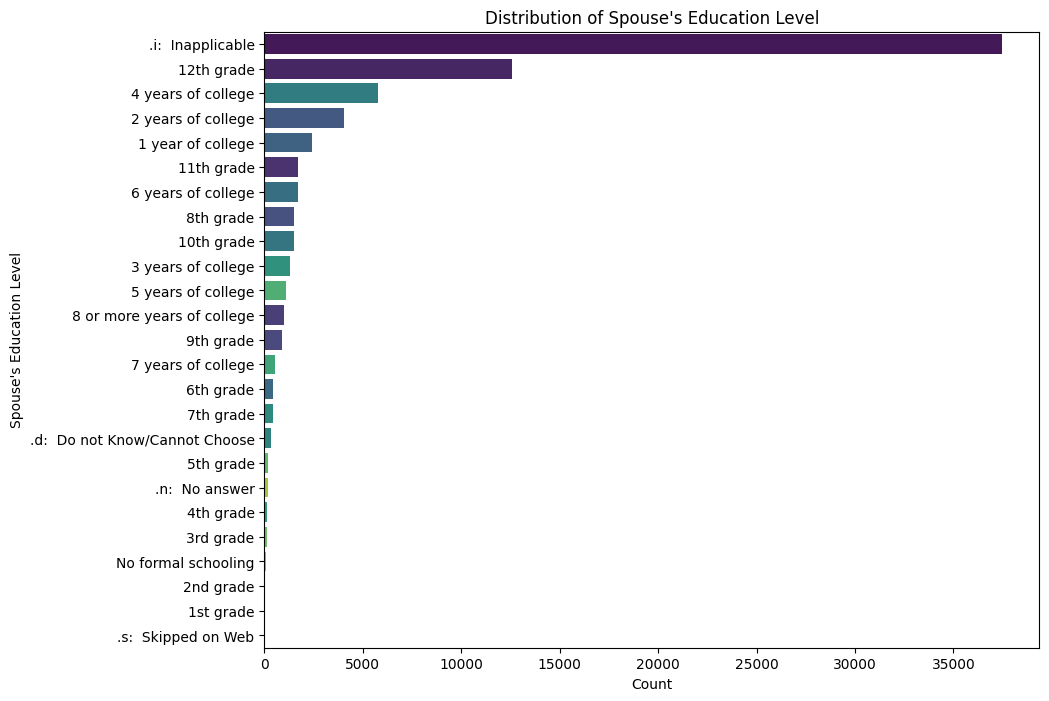

In [53]:
# Bar plot for 'speduc'
plt.figure(figsize=(10, 8))
sns.countplot(data=gss, y='speduc', order=gss['speduc'].value_counts().index, hue='speduc', palette='viridis', legend=False)
plt.title("Distribution of Spouse's Education Level")
plt.xlabel('Count')
plt.ylabel("Spouse's Education Level")
plt.show()